<a href="https://colab.research.google.com/github/BasheerAhmedk/Machine-Learning-Projects/blob/main/HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from termcolor import colored as cl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/Dataset/House_Data.csv')
df.head(5)

,Id,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,1,8450,196.0,150,856,856,854,1710,548,0,61,208500
1,2,9600,0.0,284,1262,1262,0,1262,460,298,0,181500
2,3,11250,162.0,434,920,920,866,1786,608,0,42,223500
3,4,9550,0.0,540,756,961,756,1717,642,0,35,140000
4,5,14260,350.0,490,1145,1145,1053,2198,836,192,84,250000


In [ ]:
df.describe()

,Id,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,729.822314,10507.276171,103.685262,567.070937,1055.847107,1161.270661,346.944215,1514.091598,472.475207,94.416667,46.390496,180615.063361
std,421.938123,9989.563592,181.066207,442.082927,438.119089,385.018424,436.370724,525.627765,214.106397,125.393706,66.048619,79285.541485
min,1.000000,1300.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,364.750000,7538.750000,0.000000,222.500000,794.750000,882.000000,0.000000,1128.000000,327.750000,0.000000,0.000000,129900.000000
50%,729.500000,9478.500000,0.000000,477.500000,990.500000,1086.000000,0.000000,1461.500000,478.000000,0.000000,24.000000,162700.000000
75%,1095.250000,11600.000000,166.000000,808.000000,1297.250000,1391.000000,728.000000,1776.000000,576.000000,168.000000,68.000000,214000.000000
max,1460.000000,215245.000000,1600.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,1418.000000,857.000000,547.000000,755000.000000


In [ ]:
cdf = df[['LotArea','MasVnrArea','TotalBsmtSF','SalePrice']]
cdf.head(9)

,LotArea,MasVnrArea,TotalBsmtSF,SalePrice
0,8450,196.0,856,208500
1,9600,0.0,1262,181500
2,11250,162.0,920,223500
3,9550,0.0,756,140000
4,14260,350.0,1145,250000
5,14115,0.0,796,143000
6,10084,186.0,1686,307000
7,10382,240.0,1107,200000
8,6120,0.0,952,129900


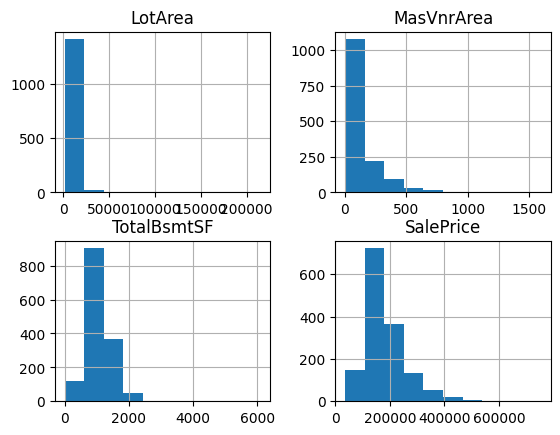

In [ ]:
viz = cdf[['LotArea','MasVnrArea','TotalBsmtSF','SalePrice']]
viz.hist()
plt.show()

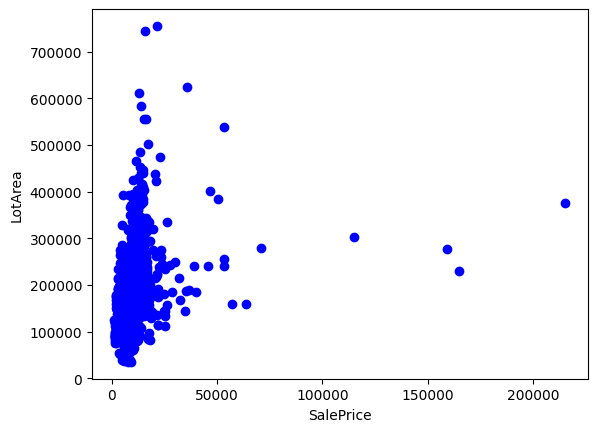

In [ ]:
plt.scatter(cdf.LotArea,cdf.SalePrice,color = 'blue')
plt.ylabel("LotArea")
plt.xlabel("SalePrice")
plt.show()

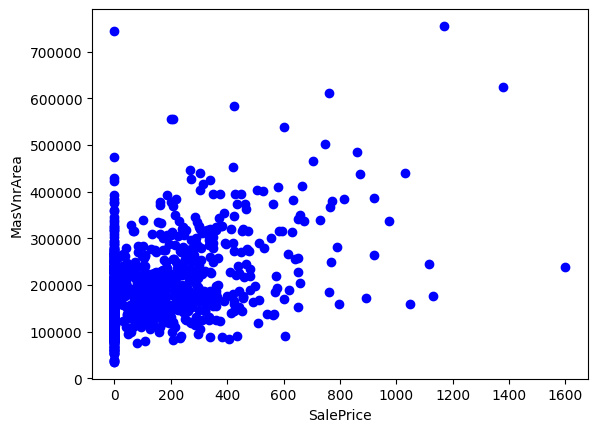

In [ ]:
plt.scatter(cdf.MasVnrArea,cdf.SalePrice,color = 'blue')
plt.xlabel("SalePrice")
plt.ylabel("MasVnrArea")
plt.show()

In [ ]:
msk = np.random.rand(len(df))< 0.8
train = cdf[msk]
test = cdf[~msk]

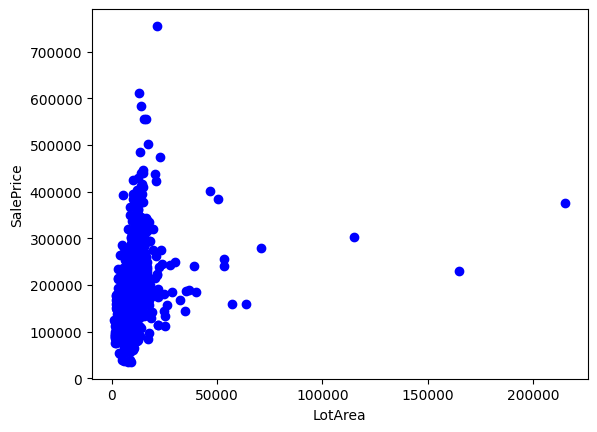

In [ ]:
plt.scatter(train.LotArea,train.SalePrice,color = 'blue')
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['LotArea']])
train_y = np.asanyarray(train[['SalePrice']])
regr.fit(train_x,train_y)

print('coefficients: ',regr.coef_)
print('Intercept: ',regr.intercept_)


coefficients:  [[1.99970999]]
Intercept:  [159628.0508162]


In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['LotArea']])
test_y = np.asanyarray(test[['SalePrice']])
test_y_ = regr.predict(test_x)

print('Mean absolute error: %.2f'% np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f"%np.mean((test_y_ - test_y)**2))
print("R2-score: %.2f"% r2_score(test_y_,test_y))

Mean absolute error: 57584.23
Residual sum of squares (MSE): 6666136352.38
R2-score: -15.98


In [ ]:
from sklearn import linear_model
regr_m = linear_model.LinearRegression()
train_x = np.asanyarray(train[['LotArea','MasVnrArea']])
train_y = np.asanyarray(train[['SalePrice']])
regr_m.fit(train_x,train_y)

print('coefficients: ',regr_m.coef_)
print('Intercept: ',regr_m.intercept_)

coefficients:  [[  1.73724111 198.21391151]]
Intercept:  [141937.14438227]


In [ ]:
test_x = np.asanyarray(test[['LotArea','MasVnrArea']])
test_y = np.asanyarray(test[['SalePrice']])
test_y_ = regr_m.predict(test_x)

print('Mean absolute error: %.2f'% np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f"%np.mean((test_y_ - test_y)**2))
print("R2-score: %.2f"% r2_score(test_y_,test_y))

Mean absolute error: 52010.66
Residual sum of squares (MSE): 5245835773.87
R2-score: -1.67
